<a href="https://colab.research.google.com/github/labibs30/Machine-Learning-Preps/blob/main/01_neural_networks_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Tensorflow
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.13.0


In [ ]:
import matplotlib.pyplot as plt


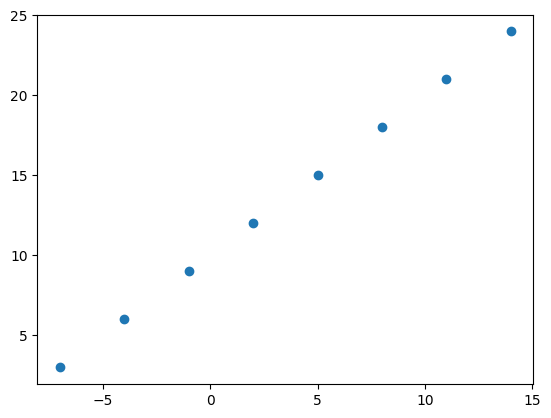

In [ ]:
X= np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,Y)

In [ ]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939750])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939750], dtype=int32)>)

In [ ]:
# Step in Modelling with Tensorflow

# 1. Creating a model -
# 2. Compiling the model
# 3. Fitting the model


In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 13.6129 - mae: 13.6129
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 13.1012 - mae: 13.1012
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 12.5884 - mae: 12.5884
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 12.0714 - mae: 12.0714
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 11.5471 - mae: 11.5471
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 11.0128 - mae: 11.0128
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 10.4652 - mae: 10.4652
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 9.9009 - mae: 9.9009
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 9.3168 - mae: 9.3168
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 8.7095 - mae: 8.7095
Epoch 11/200
1/1 [==============================] - 0s 20m

In [ ]:
model.predict([21.0])

1/1 [==============================] - 0s 121ms/step


array([[30.040495]], dtype=float32)

In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

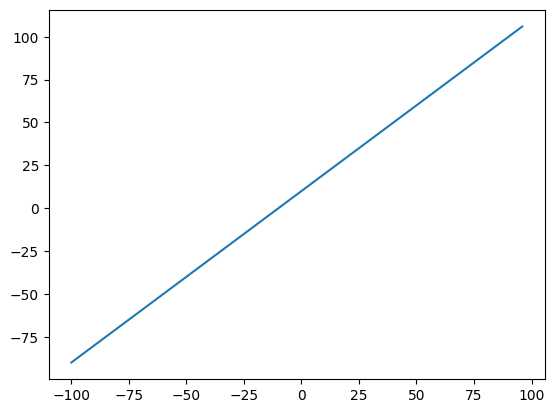

In [ ]:
# Visualize
plt.plot(X,Y)

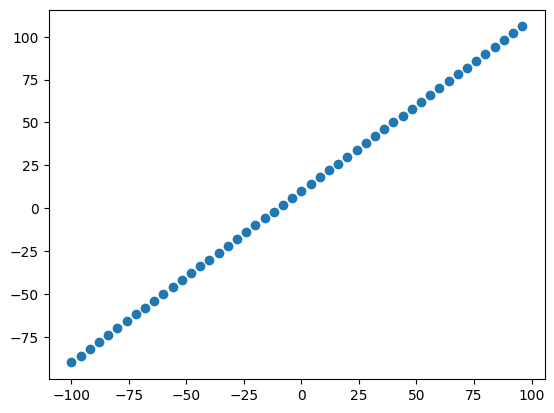

In [ ]:
plt.scatter(X,Y)

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(Y_train), len(X_test)

(40, 40, 10)

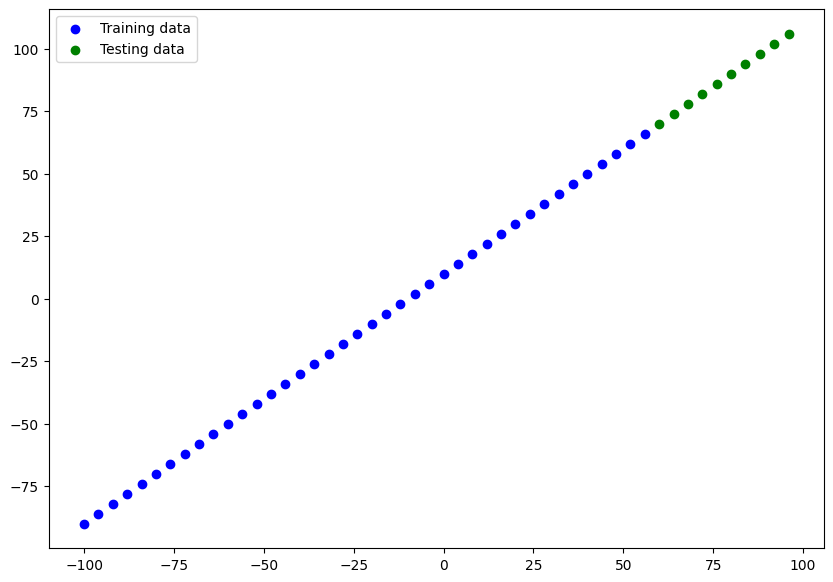

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train,c='b',label='Training data')
plt.scatter(X_test,Y_test,c='g',label='Testing data')
plt.legend()

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer'),
], name='model_1')
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])

# model.fit(X_train,Y_train,epochs=100)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X, axis=-1),Y,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 36.6233 - mae: 36.6233
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 28.1497 - mae: 28.1497
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 19.8926 - mae: 19.8926
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4827 - mae: 12.4827
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8411 - mae: 9.8411
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2527 - mae: 10.2527
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0520 - mae: 12.0520
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9694 - mae: 12.9694
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9982 - mae: 11.9982
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2005 - mae: 10.2005
Epoch 11/100
2/2 [==============================] - 0s 7ms/

In [ ]:
from tensorflow.keras.utils import plot_model

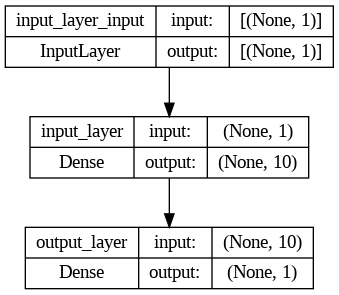

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
y_pred = model.predict(X_test)
# len(y_pred)
y_pred, Y_test

1/1 [==============================] - 0s 90ms/step


(array([[ 72.19795 ],
        [ 76.340355],
        [ 80.482765],
        [ 84.625175],
        [ 88.76757 ],
        [ 92.90998 ],
        [ 97.05239 ],
        [101.194786],
        [105.3372  ],
        [109.47961 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
def plot_predictions(train_data=X_train,train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  plt.scatter(test_data,test_labels,c='g',label='Testing Data')
  plt.scatter(test_data,predictions,c='r',label='Predictions')
  plt.legend()

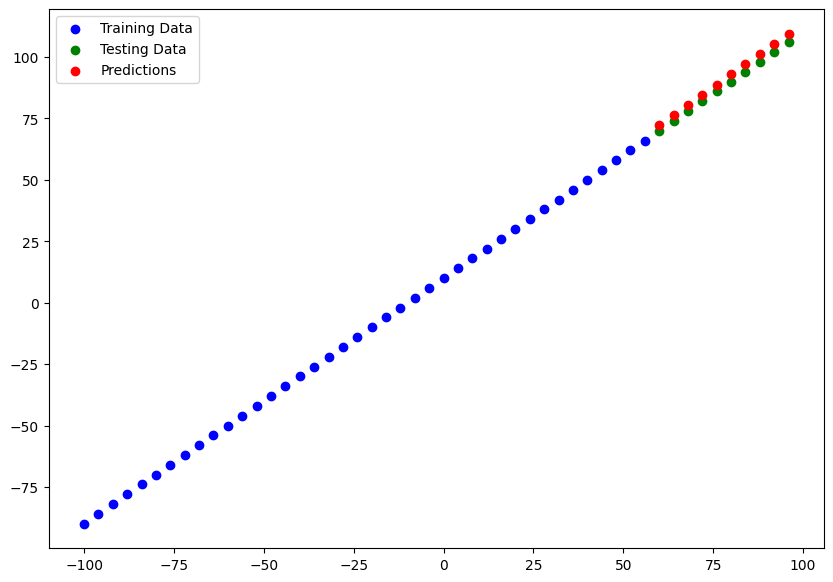

In [ ]:
plot_predictions()

In [ ]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 227ms/step - loss: 2.8388 - mae: 2.8388


[2.8387770652770996, 2.8387770652770996]

In [ ]:
# calculate the mean absoulute error

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 72.19795 ],
       [ 76.340355],
       [ 80.482765],
       [ 84.625175],
       [ 88.76757 ],
       [ 92.90998 ],
       [ 97.05239 ],
       [101.194786],
       [105.3372  ],
       [109.47961 ]], dtype=float32)>

In [ ]:
Y_test, Y_test.shape

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 TensorShape([10]))

In [ ]:
y_pred_new = tf.reshape(y_pred,[-1])
y_pred_new.shape

TensorShape([10])

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 72.19795 ,  76.340355,  80.482765,  84.625175,  88.76757 ,
        92.90998 ,  97.05239 , 101.194786, 105.3372  , 109.47961 ],
      dtype=float32)>

In [ ]:
mae = tf.keras.metrics.mean_absolute_error(y_true=Y_test,y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.838778>

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 29ms/step - loss: 80.0536 - mae: 80.0536
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 44.6734 - mae: 44.6734
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.6642 - mae: 11.6642
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3835 - mae: 9.3835
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 10.2605 - mae: 10.2605
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 9.5155 - mae: 9.5155
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6448 - mae: 8.6448
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0728 - mae: 9.0728
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 18.8943 - mae: 18.8943
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 10.2102 - mae: 10.2102
Epoch 11/100
2/2 [==============================] - 0s 14

In [ ]:
y_pred_1 = model.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 163ms/step


array([[56.47434 ],
       [60.15475 ],
       [63.835163],
       [67.51558 ],
       [71.196   ],
       [74.87641 ],
       [78.55682 ],
       [82.23724 ],
       [85.917656],
       [89.59807 ]], dtype=float32)

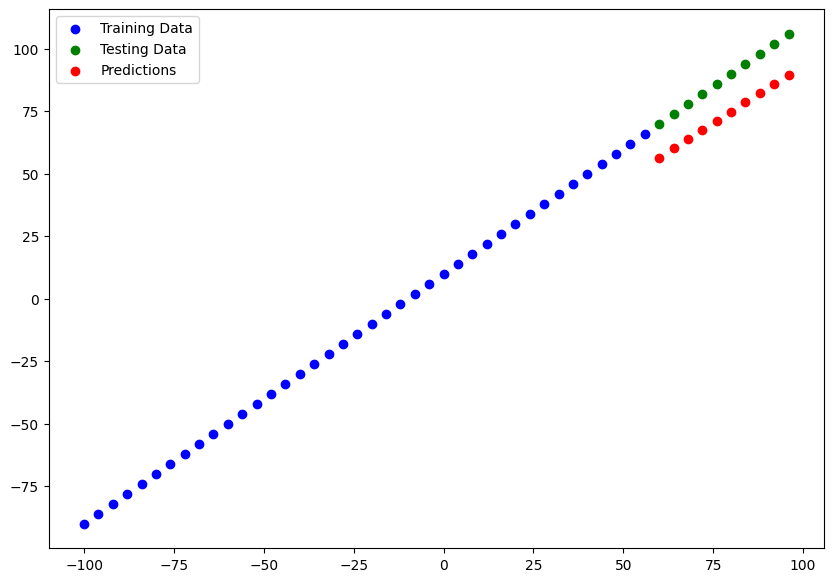

In [ ]:
plot_predictions(predictions=y_pred_1)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 13.5309 - mse: 358.8048
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.9703 - mse: 781.4171
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 19.7715 - mse: 577.7860
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.3205 - mse: 273.1474
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 20.0786 - mse: 550.4718
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1734 - mse: 91.5728
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1620 - mse: 376.7714
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1428 - mse: 437.2058
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 30.1412 - mse: 1239.2933
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9299 - mse: 195.6165
Epoch 11/100
2/2 [==============================]

In [ ]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 52ms/step


array([[ 76.54727 ],
       [ 81.53493 ],
       [ 86.52259 ],
       [ 91.510254],
       [ 96.49792 ],
       [101.48557 ],
       [106.473236],
       [111.4609  ],
       [116.44857 ],
       [121.436226]], dtype=float32)

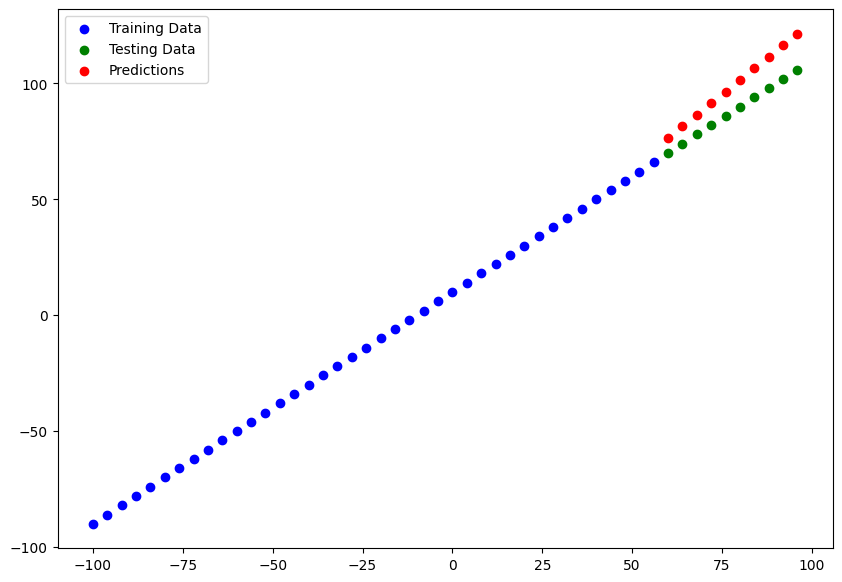

In [ ]:
plot_predictions(predictions=y_pred_2)

In [ ]:
def mae(Y_test, y_pred):
  return tf.keras.metrics.mean_absolute_error(y_true=Y_test,y_pred=tf.squeeze(y_pred))

def mse(Y_test, y_pred):
  return tf.keras.metrics.mean_squared_error(y_true=Y_test,y_pred=tf.squeeze(y_pred))

In [ ]:
mae_2 = mae(Y_test,(y_pred_2))
mse_2 = mse(Y_test, y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.991747>,
 <tf.Tensor: shape=(), dtype=float32, numpy=128.86617>)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mse'])

model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 23.1733 - mse: 914.5477
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 22.5159 - mse: 665.0531
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 28.2526 - mse: 1202.1111
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 20.1906 - mse: 580.6797
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 13.5954 - mse: 225.7641
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 10.9494 - mse: 132.1774
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.9415 - mse: 178.2141
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 10.8368 - mse: 130.6788
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 37.2440 - mse: 2130.1116
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 24.9512 - mse: 872.7227
Epoch 11/500
2/2 [============================

1/1 [==============================] - 0s 126ms/step


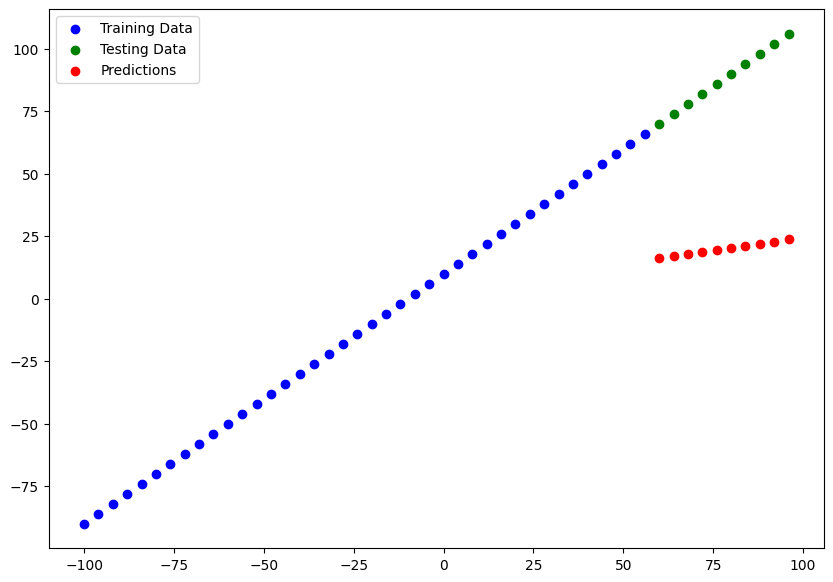

In [ ]:
y_predict_3 = model_3.predict(X_test)
plot_predictions(predictions=y_predict_3)